## Ví dụ 1

In [1]:
import numpy as np 
from random import shuffle 
 
N, C, d = 25000, 10, 3000 
reg = .05  
W = np.random.randn(d, C) 
X = np.random.randn(d, N) 
y = np.random.randint(C, size = N)

In [4]:
# calculate loss and gradient base on original formula 
# reg = 1/C 
def svm_loss_grad (W, X, y, reg): 
    d, C = W.shape  
    _, N = X.shape  
     
    ## Loss 
    loss = 0 
    ## Gradient 
    dW = np.zeros_like(W) 
    for n in range(N): 
        xn = X[:, n] 
        score = W.T.dot(xn) 
        for j in range(C): 
            if j == y[n]: 
                continue  
     # 1 – (b_yn + W_yn.x_n) + (b_j + W_j.x_n)   
            margin = 1 - score[y[n]] + score[j] 
            if margin > 0: 
                loss += margin  
                dW[:, j] += xn  
                dW[:, y[n]] -= xn 
     
    loss /= N  
    loss += 0.5*reg*np.sum(W * W) # regularization + 1/2C * ||w||^2 
     
    dW /= N  
    dW += reg*W # gradient off regularization 1/C*w 
    return loss, dW

# Mini-batch gradient descent 
def multiclass_svm_GD(X, y, Winit, reg, lr=.1, batch_size = 100, num_iters = 1000, print_every = 100): 
    W = Winit
    loss_history = np.zeros((num_iters)) 
    for it in range(num_iters): 
        # randomly pick a batch of X 
        idx = np.random.choice(X.shape[1], batch_size) 
        X_batch = X[:, idx] 
        y_batch = y[idx] 
 
        loss_history[it], dW = svm_loss_grad(W, X_batch, y_batch, reg) 
 
        W -= lr*dW  
        if it % print_every == 1: 
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it])) 
 
    return W, loss_history

it 1/1000, loss = 1032.856277
it 101/1000, loss = 360.030333
it 201/1000, loss = 139.873261
it 301/1000, loss = 56.442270
it 401/1000, loss = 38.388403
it 501/1000, loss = 30.013848
it 601/1000, loss = 32.075752
it 701/1000, loss = 26.365246
it 801/1000, loss = 27.122714
it 901/1000, loss = 28.609515


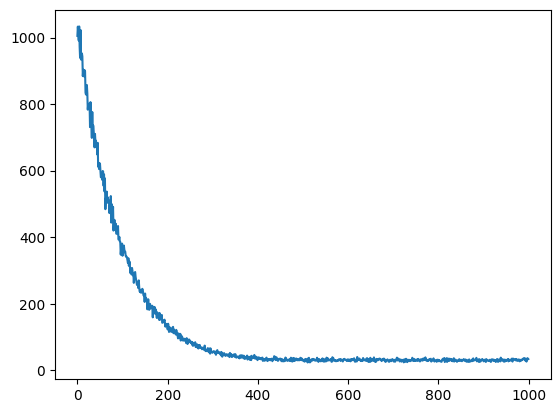

In [5]:
W, loss_history = multiclass_svm_GD(X, y, W, reg) 
 
import matplotlib.pyplot as plt 
# plot loss as a function of iteration 
plt.plot(loss_history) 
plt.show()

Độ chính xác trên tập huấn luyện: 0.2662


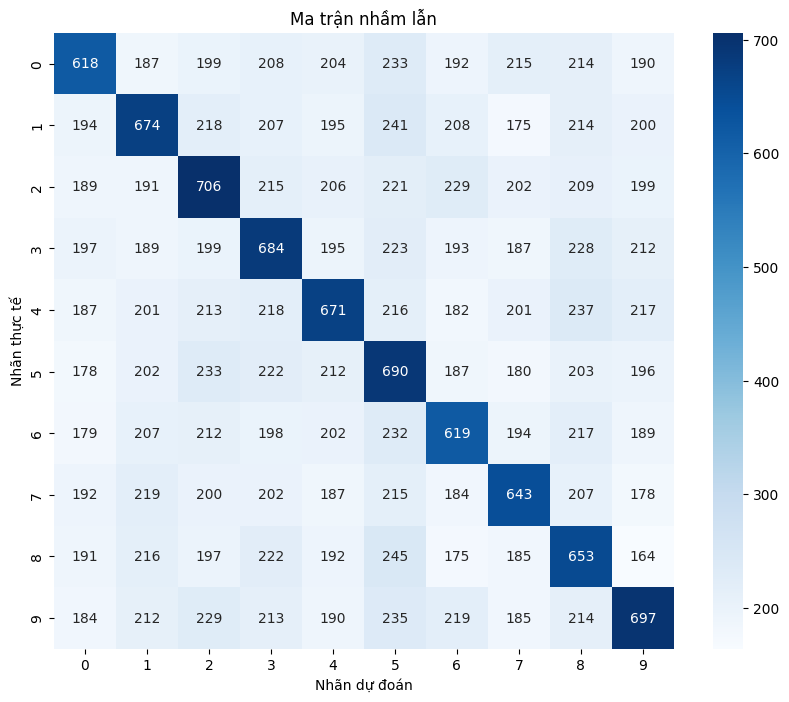

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.27      0.25      0.26      2460
           1       0.27      0.27      0.27      2526
           2       0.27      0.28      0.27      2567
           3       0.26      0.27      0.27      2507
           4       0.27      0.26      0.27      2543
           5       0.25      0.28      0.26      2503
           6       0.26      0.25      0.26      2449
           7       0.27      0.26      0.27      2427
           8       0.25      0.27      0.26      2440
           9       0.29      0.27      0.28      2578

    accuracy                           0.27     25000
   macro avg       0.27      0.27      0.27     25000
weighted avg       0.27      0.27      0.27     25000

Precision trung bình: 0.2665
Recall trung bình: 0.2661
F1-score trung bình: 0.2661


In [7]:
# Hàm dự đoán nhãn cho dữ liệu đầu vào
def predict(W, X):
    scores = W.T.dot(X)  # (C, N)
    y_pred = np.argmax(scores, axis=0)
    return y_pred

# Đánh giá mô hình
y_pred = predict(W, X)
accuracy = np.mean(y_pred == y)
print(f"Độ chính xác trên tập huấn luyện: {accuracy:.4f}")

# Tính toán ma trận nhầm lẫn
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Ma trận nhầm lẫn')
plt.ylabel('Nhãn thực tế')
plt.xlabel('Nhãn dự đoán')
plt.show()

# Hiển thị các chỉ số đánh giá chi tiết
print("Báo cáo phân loại:")
print(classification_report(y, y_pred))

# Tính precision, recall, F1 cho từng lớp
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y, y_pred, average=None)
recall = recall_score(y, y_pred, average=None)
f1 = f1_score(y, y_pred, average=None)

# Tính trung bình các chỉ số
print(f"Precision trung bình: {np.mean(precision):.4f}")
print(f"Recall trung bình: {np.mean(recall):.4f}")  
print(f"F1-score trung bình: {np.mean(f1):.4f}")

## Bài tập tự thực hành 1

In [9]:
# method to compute loss function and its gradient  
# here vectorization was used to speed up 
def svm_loss_vectorized(W, X, y, reg): 
    d, C = W.shape  
    _, N = X.shape  
    loss = 0  
    dW = np.zeros_like(W) 
     
    Z = W.T.dot(X)      
     
    correct_class_score = np.choose(y, Z).reshape(N,1).T      
    margins = np.maximum(0, Z - correct_class_score + 1)  
    margins[y, np.arange(margins.shape[1])] = 0 
# Loss function 
    loss = np.sum(margins, axis = (0, 1)) 
    loss /= N  
    loss += 0.5 * reg * np.sum(W * W) 
     
    F = (margins > 0).astype(int) 
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0) 
# Gradient 
    dW = X.dot(F.T)/N + reg*W 
    return loss, dW

# Mini-batch gradient descent 
def multiclass_svm_GD_vectorized (X, y, Winit, reg, lr=.1, 
                                  batch_size = 100, num_iters = 1000, print_every = 100): 
    W = Winit  
    loss_history = np.zeros((num_iters)) 
    for it in range(num_iters): 
        # randomly pick a batch of X 
        idx = np.random.choice(X.shape[1], batch_size) 
        X_batch = X[:, idx] 
        y_batch = y[idx] 
 
        loss_history[it], dW = svm_loss_vectorized(W, X_batch, y_batch, reg) 
 
        W -= lr*dW  
        if it % print_every == 1: 
            print ('it %d/%d, loss = %f' %(it, num_iters, loss_history[it])) 
 
    return W, loss_history

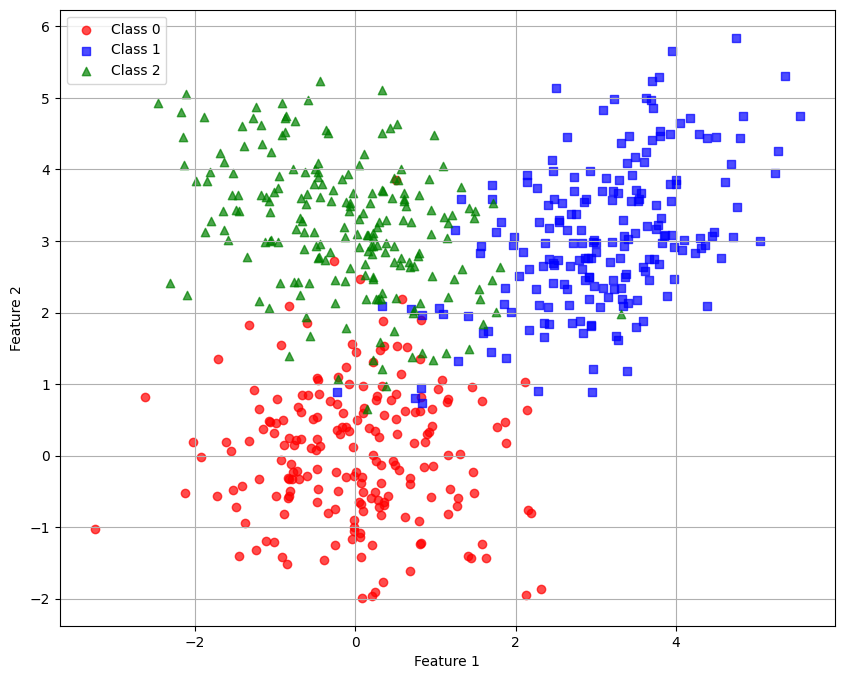

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

np.random.seed(42) 

C = 3
samples_per_class = 200
N = C * samples_per_class
d = 2  

# Tạo dữ liệu với phân bố chuẩn
means = np.array([[0, 0], [3, 3], [0, 3]])
covs = np.array([[[1, 0], [0, 1]], 
                 [[1, 0.5], [0.5, 1]], 
                 [[1, -0.5], [-0.5, 1]]])

# Tạo dữ liệu và nhãn
X = np.zeros((d, N))
y = np.zeros(N, dtype=int)

for i in range(C):
    start_idx = i * samples_per_class
    end_idx = (i + 1) * samples_per_class
    X[:, start_idx:end_idx] = np.random.multivariate_normal(means[i], covs[i], samples_per_class).T
    y[start_idx:end_idx] = i

# Trực quan hóa dữ liệu
plt.figure(figsize=(10, 8))
colors = ['red', 'blue', 'green']
markers = ['o', 's', '^']

for i in range(C):
    idx = y == i
    plt.scatter(X[0, idx], X[1, idx], c=colors[i], marker=markers[i], 
                label=f'Class {i}', alpha=0.7)

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()

it 1/1000, loss = 1.008105
it 101/1000, loss = 0.827669
it 201/1000, loss = 0.891949
it 301/1000, loss = 0.799046
it 401/1000, loss = 0.897741
it 501/1000, loss = 0.724901
it 601/1000, loss = 0.885514
it 701/1000, loss = 0.820313
it 801/1000, loss = 0.684540
it 901/1000, loss = 1.022776


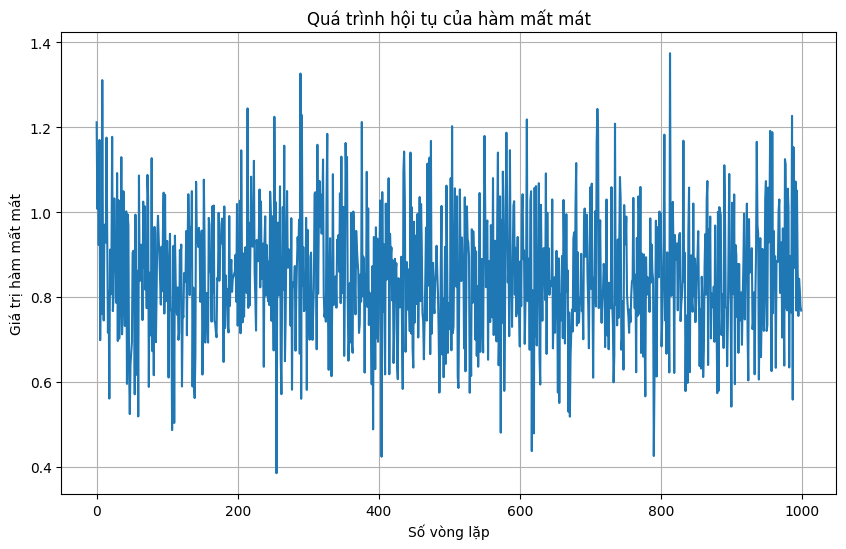

Độ chính xác: 0.6850

Báo cáo phân loại:
              precision    recall  f1-score   support

           0       1.00      0.17      0.29       200
           1       0.67      0.96      0.79       200
           2       0.67      0.92      0.77       200

    accuracy                           0.69       600
   macro avg       0.78      0.69      0.62       600
weighted avg       0.78      0.69      0.62       600



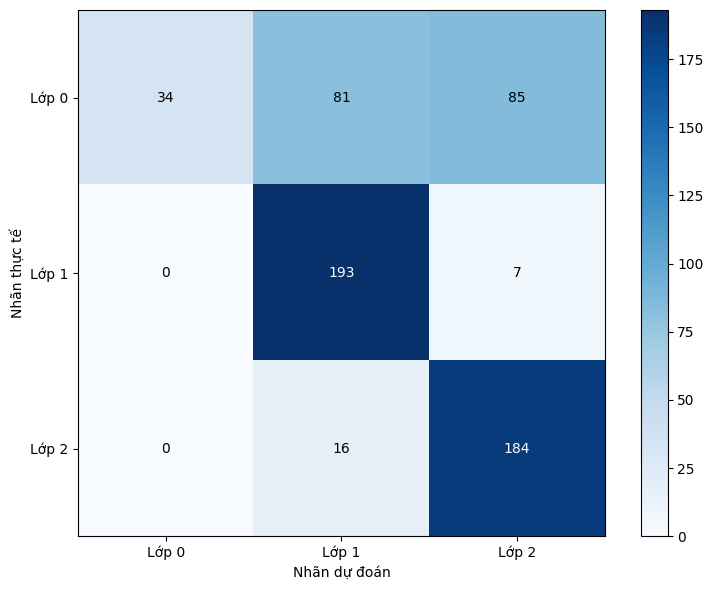

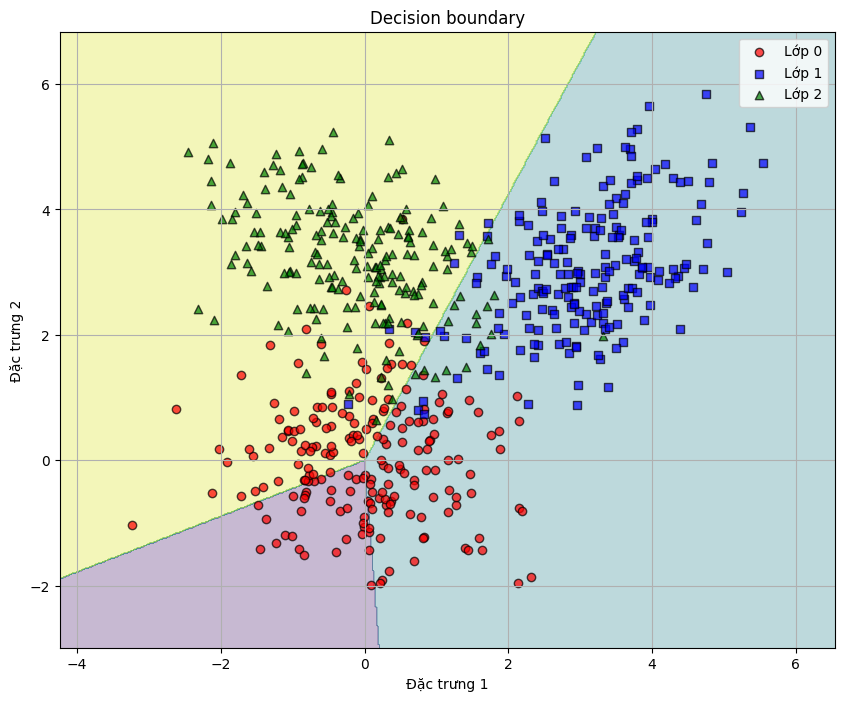

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11024\3110022089.py:98: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X[0, idx_wrong], X[1, idx_wrong], c=colors[i], marker='x',


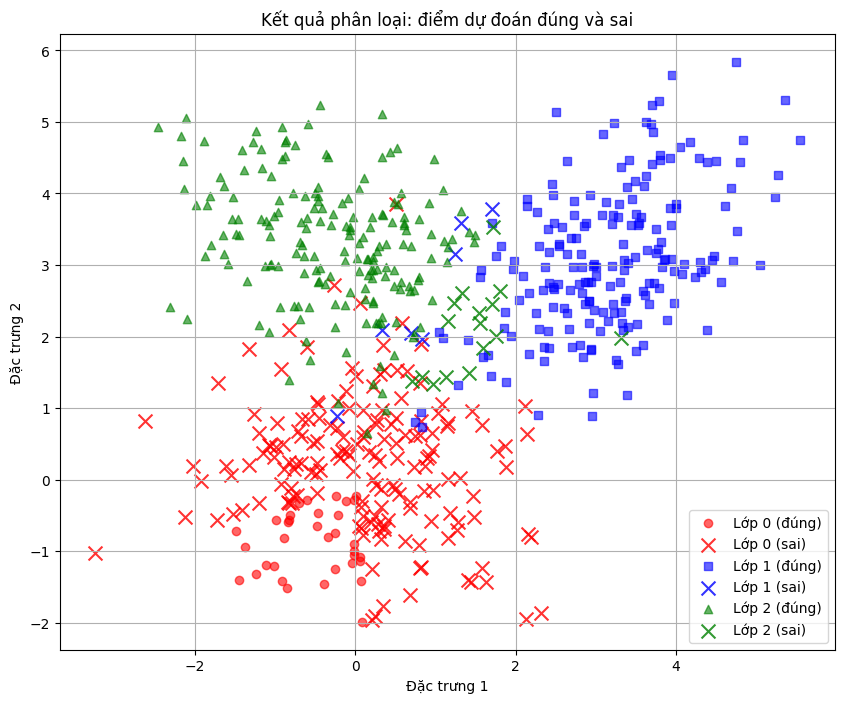

In [13]:
reg = 0.05  
W = np.random.randn(d, C)

# Huấn luyện mô hình SVM đa lớp
W_trained, loss_history = multiclass_svm_GD(X, y, W, reg, lr=0.1, 
                                           batch_size=50, num_iters=1000, print_every=100)

# Vẽ quá trình hội tụ của hàm mất mát
plt.figure(figsize=(10, 6))
plt.plot(loss_history)
plt.title('Quá trình hội tụ của hàm mất mát')
plt.xlabel('Số vòng lặp')
plt.ylabel('Giá trị hàm mất mát')
plt.grid(True)
plt.show()

# Dự đoán nhãn
def predict(W, X):
    scores = W.T.dot(X)  # (C, N)
    y_pred = np.argmax(scores, axis=0)
    return y_pred

y_pred = predict(W_trained, X)
accuracy = np.mean(y_pred == y)
print(f"Độ chính xác: {accuracy:.4f}")

# Đánh giá
print("\nBáo cáo phân loại:")
print(classification_report(y, y_pred))

conf_matrix = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(C)
plt.xticks(tick_marks, [f'Lớp {i}' for i in range(C)])
plt.yticks(tick_marks, [f'Lớp {i}' for i in range(C)])
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')

# Hiển thị giá trị trong ma trận
thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# Trực quan hóa ranh giới quyết định
def plot_decision_boundary(W, X, y):
    # Tạo lưới điểm để vẽ ranh giới quyết định
    h = 0.02  # kích thước bước lưới
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Dự đoán nhãn cho mỗi điểm trên lưới
    grid_points = np.vstack([xx.ravel(), yy.ravel()])
    Z = predict(W, grid_points)
    Z = Z.reshape(xx.shape)
    
    # Vẽ ranh giới quyết định và dữ liệu
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Vẽ các điểm dữ liệu
    for i in range(C):
        idx = y == i
        plt.scatter(X[0, idx], X[1, idx], c=colors[i], marker=markers[i], 
                    label=f'Lớp {i}', edgecolors='k', alpha=0.7)
    
    plt.legend()
    plt.title('Decision boundary')
    plt.xlabel('Đặc trưng 1')
    plt.ylabel('Đặc trưng 2')
    plt.grid(True)
    plt.show()

# Vẽ ranh giới quyết định
plot_decision_boundary(W_trained, X, y)

# Vẽ cả điểm dự đoán đúng và sai
plt.figure(figsize=(10, 8))
correct = (y_pred == y)

for i in range(C):
    # Vẽ các điểm dự đoán đúng
    idx_correct = (y == i) & correct
    plt.scatter(X[0, idx_correct], X[1, idx_correct], c=colors[i], marker=markers[i],
                label=f'Lớp {i} (đúng)', alpha=0.6)
    
    # Vẽ các điểm dự đoán sai
    idx_wrong = (y == i) & ~correct
    if np.any(idx_wrong):
        plt.scatter(X[0, idx_wrong], X[1, idx_wrong], c=colors[i], marker='x',
                    s=100, label=f'Lớp {i} (sai)', alpha=0.8, edgecolors='black')

plt.legend()
plt.title('Kết quả phân loại: điểm dự đoán đúng và sai')
plt.xlabel('Đặc trưng 1')
plt.ylabel('Đặc trưng 2')
plt.grid(True)
plt.show()

## Bài tập thực hành 3

In [17]:
def get_mnist_data(images_path, labels_path, num_images 
                   , shuffle=False, _is=True, image_size=28): 
    """ 
        This shuffle param is active when .gz is downloaded at: 
            - 'http://yann.lecun.com/exdb/mnist/' 
            - This function return random num_images in 60000 or 10000   
    """ 
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64) 
     
    # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
         
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels

In [18]:
# train path 
train_images_path = 'train-images-idx3-ubyte.gz'
train_labels_path = 'train-labels-idx1-ubyte.gz'
# test path 
test_images_path = 't10k-images-idx3-ubyte.gz'
test_labels_path = 't10k-labels-idx1-ubyte.gz'

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11024\3848135005.py:37: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


(5000, 784) (5000,)
(10000, 784) (10000,)


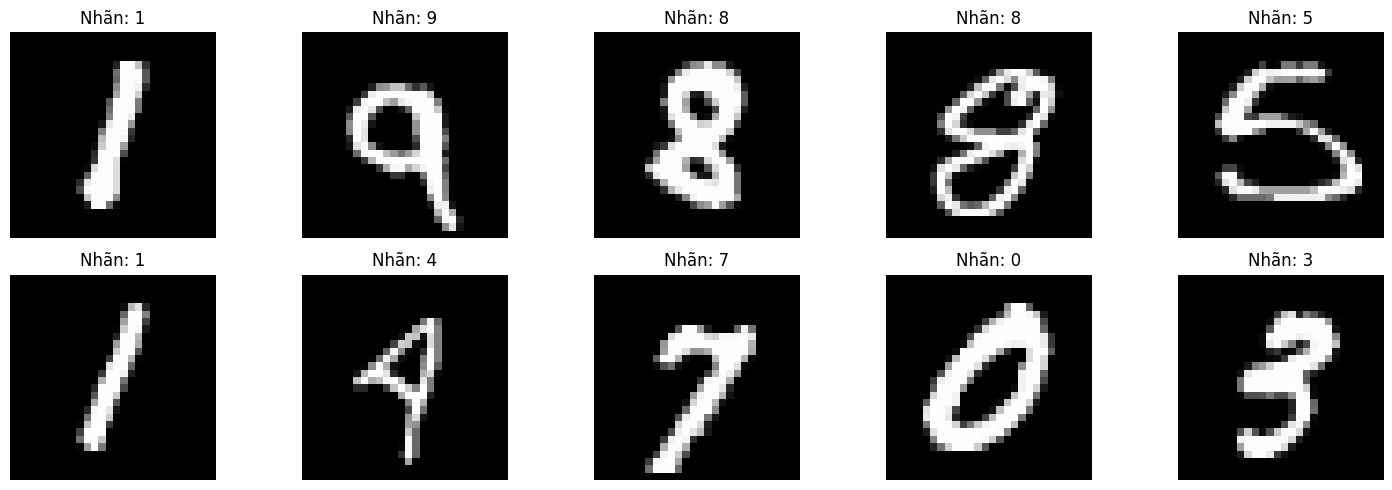

In [20]:
train_images, train_labels = get_mnist_data( 
    train_images_path, train_labels_path, 5000, shuffle=True) 
 
test_images, test_labels = get_mnist_data( 
    test_images_path, test_labels_path, 10000, _is=False, shuffle=True) 
 
print(train_images.shape, train_labels.shape) 
print(test_images.shape, test_labels.shape)

# Hiển thị một vài hình ảnh mẫu
plt.figure(figsize=(15, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Nhãn: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [21]:
# Chuẩn hóa dữ liệu
train_images = train_images / 255.0  # Chia cho 255 để có giá trị từ 0 đến 1
test_images = test_images / 255.0

# Chuyển dữ liệu sang định dạng (d, N) cho SVM
X_train = train_images.T  # Chuyển từ (N, d) sang (d, N)
X_test = test_images.T
y_train = train_labels
y_test = test_labels

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (784, 5000), y_train: (5000,)
X_test: (784, 10000), y_test: (10000,)


Bắt đầu huấn luyện SVM đa lớp...
it 1/2000, loss = 7.228795
it 101/2000, loss = 0.521339
it 201/2000, loss = 0.359520
it 301/2000, loss = 0.213224
it 401/2000, loss = 0.519465
it 501/2000, loss = 0.228698
it 601/2000, loss = 0.405002
it 701/2000, loss = 0.306442
it 801/2000, loss = 0.651092
it 901/2000, loss = 0.331201
it 1001/2000, loss = 0.210299
it 1101/2000, loss = 0.198523
it 1201/2000, loss = 0.256391
it 1301/2000, loss = 0.310980
it 1401/2000, loss = 0.188520
it 1501/2000, loss = 0.183217
it 1601/2000, loss = 0.220339
it 1701/2000, loss = 0.379728
it 1801/2000, loss = 0.230839
it 1901/2000, loss = 0.282693
Huấn luyện hoàn tất!


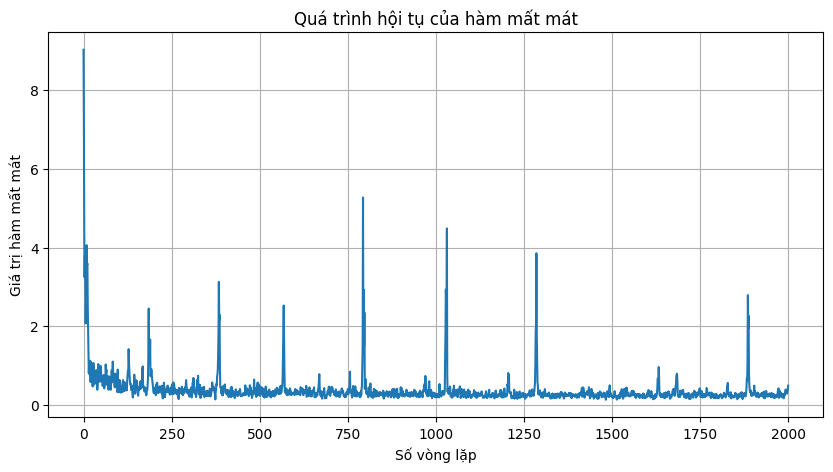

In [ ]:
d = X_train.shape[0]  # Số chiều đặc trưng (784 đối với MNIST)
C = 10  # Số lớp (10 chữ số từ 0 đến 9)
reg = 0.001  # Tham số điều chuẩn

# Khởi tạo trọng số với phân phối chuẩn
np.random.seed(42)
W_init = np.random.randn(d, C) * 0.001

W_trained, loss_history = multiclass_svm_GD(X_train, y_train, W_init, reg, 
                                          lr=0.5, batch_size=200, 
                                          num_iters=2000, print_every=100)

# Vẽ đồ thị quá trình học
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('Quá trình hội tụ của hàm mất mát')
plt.xlabel('Số vòng lặp')
plt.ylabel('Giá trị hàm mất mát')
plt.grid(True)
plt.show()

Độ chính xác trên tập huấn luyện: 0.9274
Độ chính xác trên tập kiểm tra: 0.8634


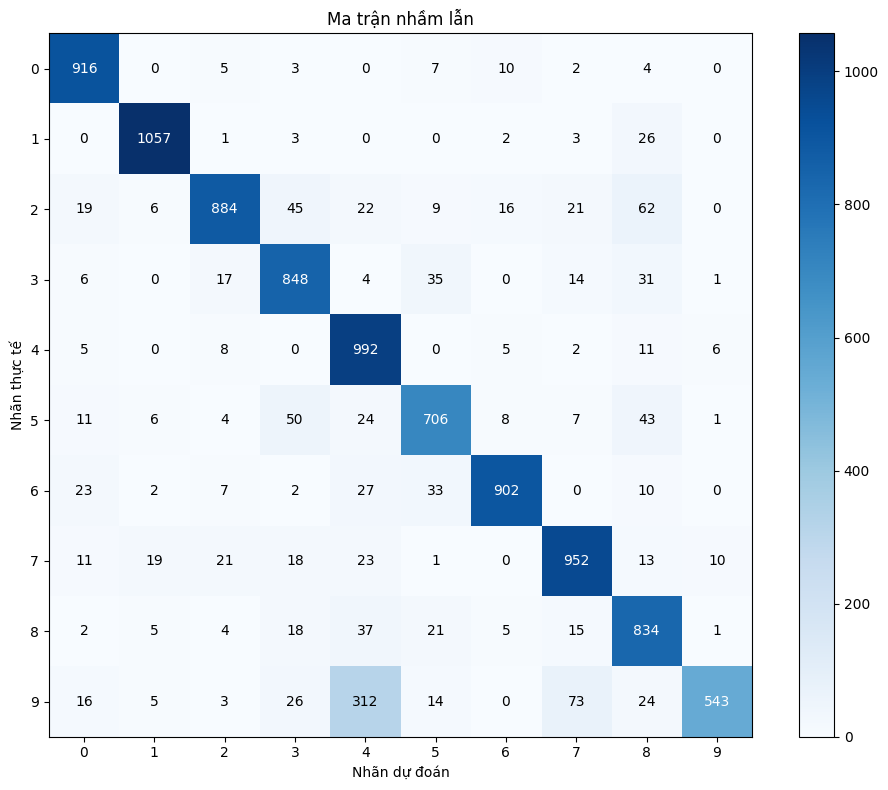


Báo cáo phân loại:
              precision    recall  f1-score   support

           0       0.91      0.97      0.94       947
           1       0.96      0.97      0.96      1092
           2       0.93      0.82      0.87      1084
           3       0.84      0.89      0.86       956
           4       0.69      0.96      0.80      1029
           5       0.85      0.82      0.84       860
           6       0.95      0.90      0.92      1006
           7       0.87      0.89      0.88      1068
           8       0.79      0.89      0.83       942
           9       0.97      0.53      0.69      1016

    accuracy                           0.86     10000
   macro avg       0.88      0.86      0.86     10000
weighted avg       0.88      0.86      0.86     10000



In [23]:
# Hàm dự đoán
def predict(W, X):
    scores = W.T.dot(X)
    y_pred = np.argmax(scores, axis=0)
    return y_pred

# Đánh giá trên tập huấn luyện
y_train_pred = predict(W_trained, X_train)
train_accuracy = np.mean(y_train_pred == y_train)

# Đánh giá trên tập kiểm tra
y_test_pred = predict(W_trained, X_test)
test_accuracy = np.mean(y_test_pred == y_test)

print(f"Độ chính xác trên tập huấn luyện: {train_accuracy:.4f}")
print(f"Độ chính xác trên tập kiểm tra: {test_accuracy:.4f}")

# Tính ma trận nhầm lẫn
conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Ma trận nhầm lẫn')
plt.colorbar()
tick_marks = np.arange(10)
plt.xticks(tick_marks, range(10))
plt.yticks(tick_marks, range(10))
plt.xlabel('Nhãn dự đoán')
plt.ylabel('Nhãn thực tế')

# Hiển thị giá trị trong ma trận
thresh = conf_matrix.max() / 2
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, conf_matrix[i, j],
                ha="center", va="center",
                color="white" if conf_matrix[i, j] > thresh else "black")
plt.tight_layout()
plt.show()

# In báo cáo phân loại
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_test_pred))

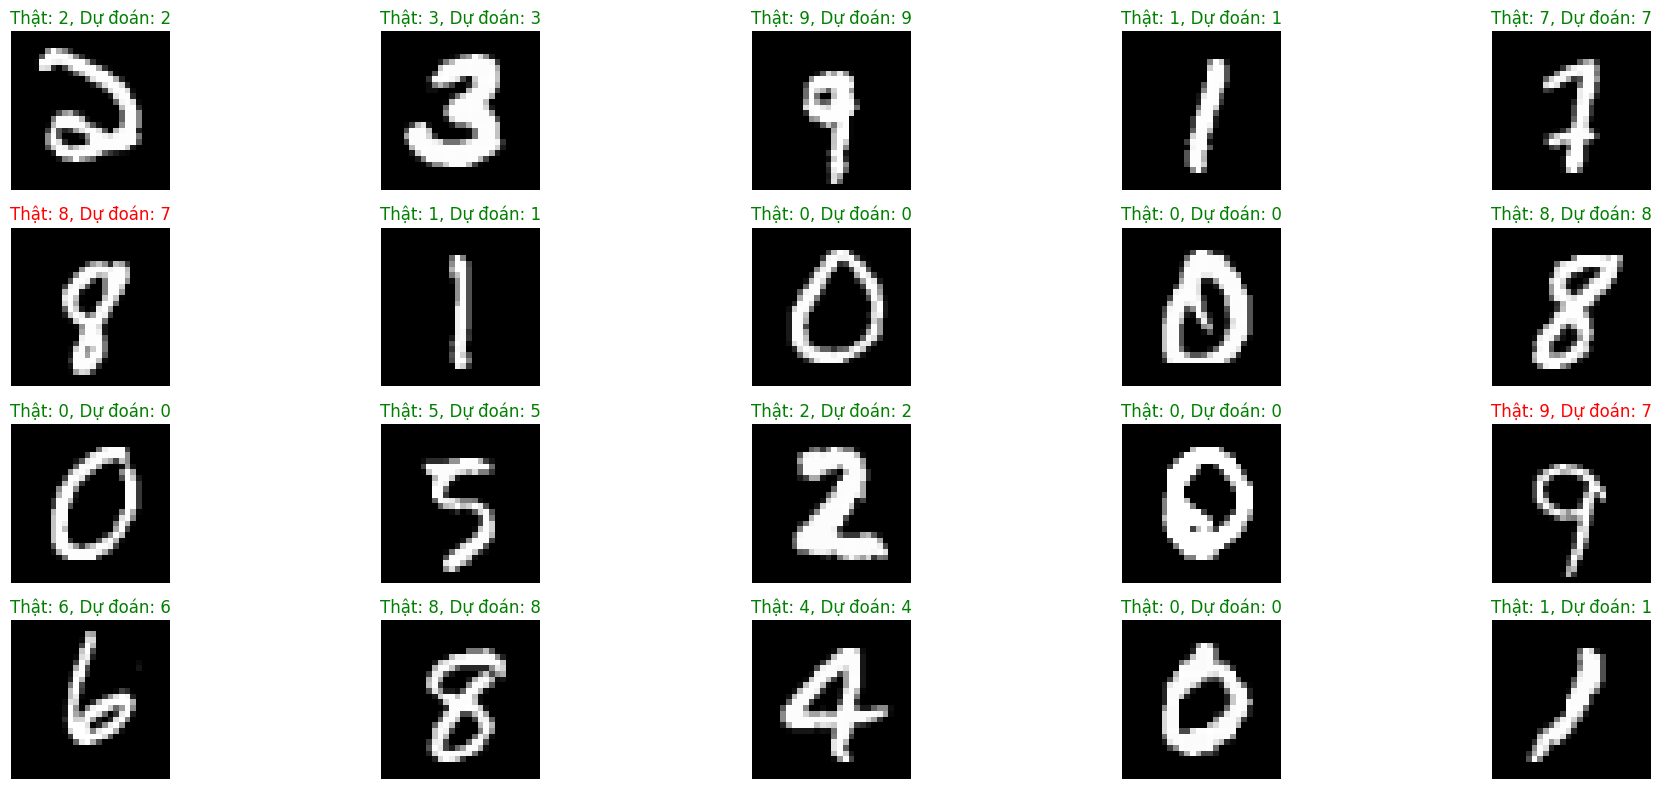

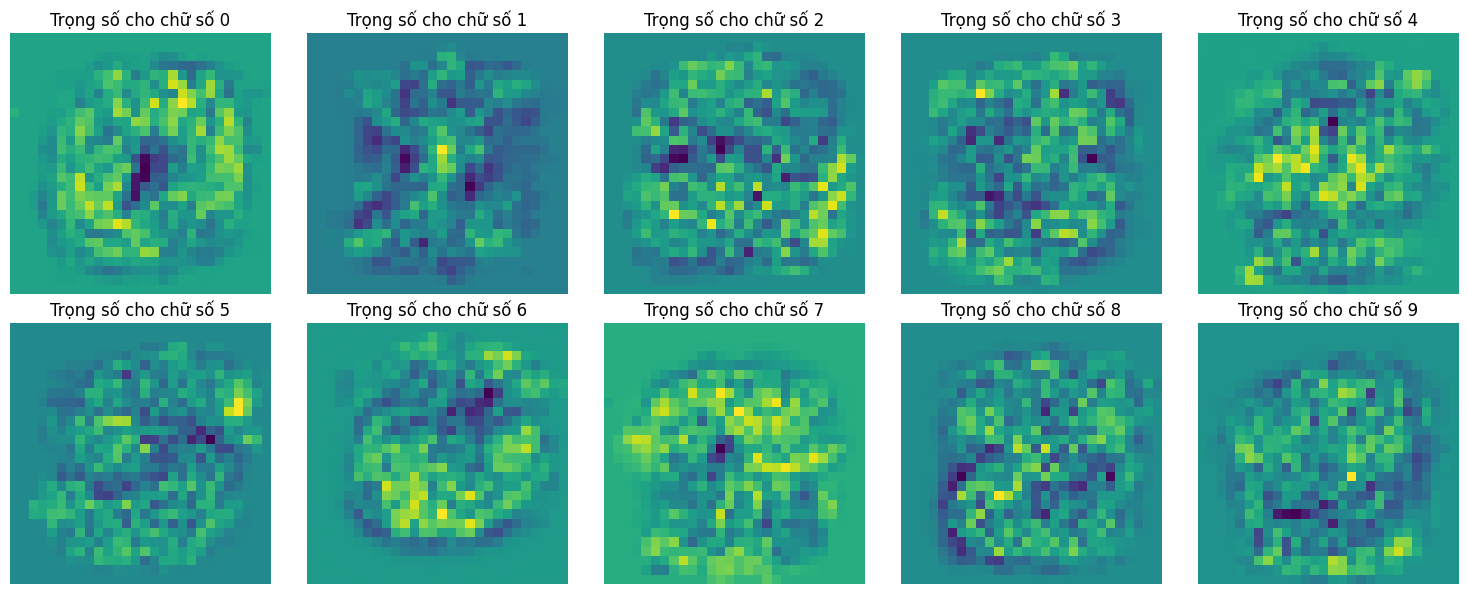

In [24]:
# Hiển thị một số hình ảnh với nhãn đúng và nhãn dự đoán
def display_predictions(images, true_labels, pred_labels, n_samples=20):
    # Chọn ngẫu nhiên n_samples hình ảnh
    indices = np.random.choice(len(images), n_samples, replace=False)
    
    plt.figure(figsize=(20, 8))
    for i, idx in enumerate(indices):
        plt.subplot(4, 5, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        if true_labels[idx] == pred_labels[idx]:
            color = 'green'
        else:
            color = 'red'
        plt.title(f"Thật: {true_labels[idx]}, Dự đoán: {pred_labels[idx]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Hiển thị kết quả dự đoán
display_predictions(test_images, y_test, y_test_pred)

# Trực quan hóa trọng số học được cho mỗi lớp
def plot_weights(W, figsize=(15, 6)):
    plt.figure(figsize=figsize)
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        # Reshape trọng số của mỗi lớp thành hình ảnh 28x28
        w_img = W[:, i].reshape(28, 28)
        plt.imshow(w_img, cmap='viridis')
        plt.title(f'Trọng số cho chữ số {i}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Hiển thị trọng số học được
plot_weights(W_trained)

## Ví dụ 2

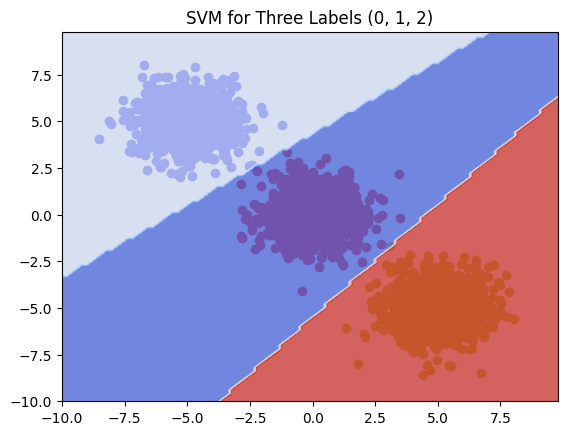

In [14]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler 
from sklearn.svm import SVC 
 
N = 1000  # Number of samples 
 
# Create synthetic dataset 
X1 = np.random.normal(loc=0, scale=1, size=(N, 2)) 
Y1 = 0 * np.ones(shape=(1000,))  # LABEL = 0
X2 = np.random.normal(loc=[-5, 5], scale=1, size=(N, 2)) 
Y2 = 1 * np.ones(shape=(1000,))  # LABEL = 1 
 
X3 = np.random.normal(loc=[5, -5], scale=1, size=(N, 2)) 
Y3 = 2 * np.ones(shape=(1000,))  # LABEL = 2 
 
# Create stacked dataset 
X = np.vstack((X1, X2, X3)) 
Y = np.hstack((Y1, Y2, Y3)) 
 
# TRAIN SVM LEARNING ALGORITHM 
clf = SVC(kernel='linear') 
clf = clf.fit(X, Y) 
 
# create decision boundary plot 
xx, yy = np.meshgrid( 
    np.arange(-10, 10, 0.2), 
    np.arange(-10, 10, 0.2)) 
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape) 
 
# PLOT EVERYTHING 
plt.scatter(X1[:,0], X1[:,1], color='r') 
plt.scatter(X2[:,0], X2[:,1], color='b') 
plt.scatter(X3[:,0], X3[:,1], color='y') 
plt.contourf(xx,yy,Z,cmap=plt.cm.coolwarm, alpha=0.8) 
plt.title("SVM for Three Labels (0, 1, 2)") 
plt.show()

## Bài tập thực hành 4

Đọc dữ liệu...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_11024\316284855.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64)


Kích thước dữ liệu huấn luyện: (1000, 784), nhãn: (1000,)
Kích thước dữ liệu kiểm tra: (500, 784), nhãn: (500,)


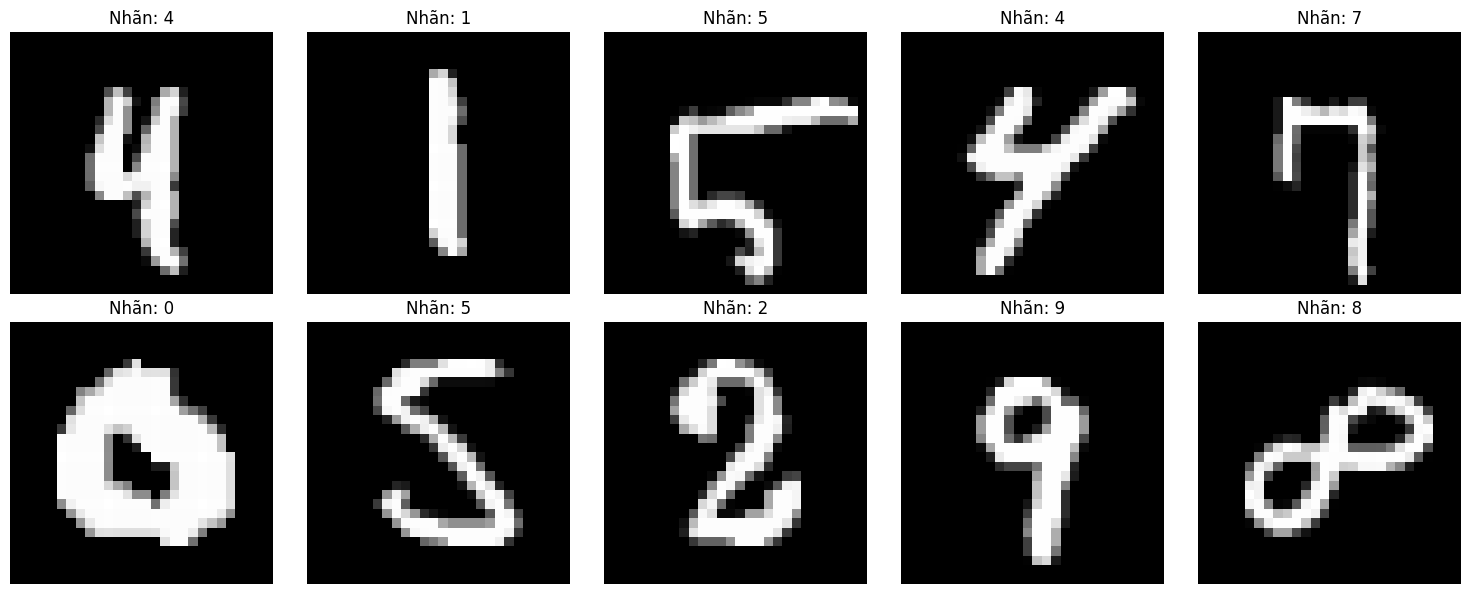

Chuẩn hóa dữ liệu...
X_train: (784, 1000), y_train: (1000,)
X_test: (784, 500), y_test: (500,)
it 0/1500, loss = 9.022744
it 100/1500, loss = 0.087376
it 200/1500, loss = 0.041084
it 300/1500, loss = 0.230943
it 400/1500, loss = 0.026671
it 500/1500, loss = 0.026310
it 600/1500, loss = 0.023597
it 700/1500, loss = 0.023156
it 800/1500, loss = 0.021697
it 900/1500, loss = 0.020642
it 1000/1500, loss = 0.024955
it 1100/1500, loss = 0.033945
it 1200/1500, loss = 0.023920
it 1300/1500, loss = 0.022753
it 1400/1500, loss = 0.021739


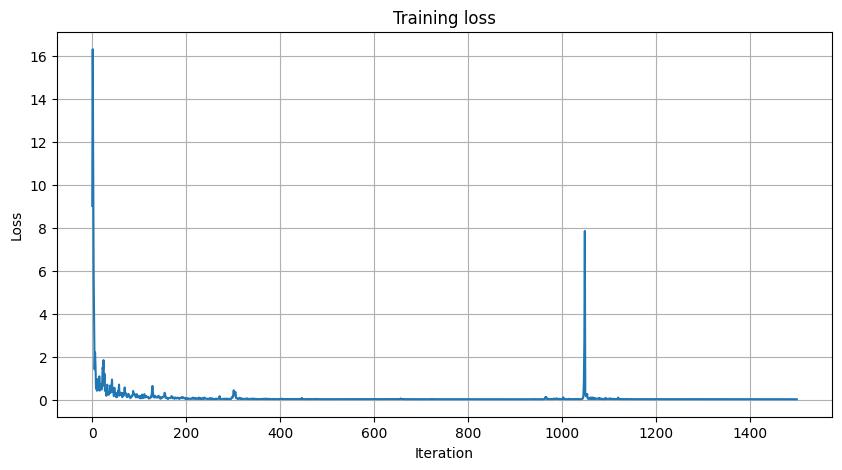

Train accuracy: 1.0000
Test accuracy: 0.8700


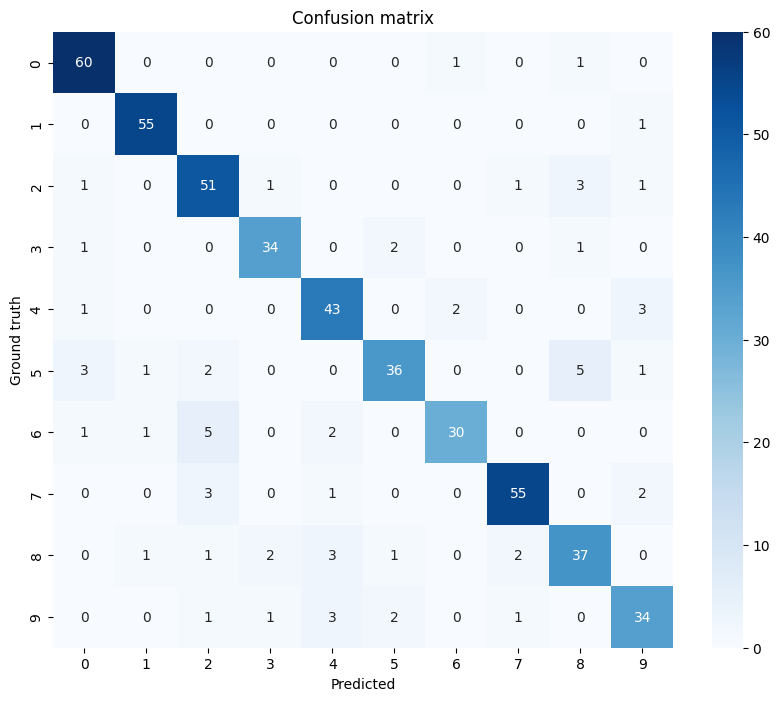

              precision    recall  f1-score   support

           0       0.90      0.97      0.93        62
           1       0.95      0.98      0.96        56
           2       0.81      0.88      0.84        58
           3       0.89      0.89      0.89        38
           4       0.83      0.88      0.85        49
           5       0.88      0.75      0.81        48
           6       0.91      0.77      0.83        39
           7       0.93      0.90      0.92        61
           8       0.79      0.79      0.79        47
           9       0.81      0.81      0.81        42

    accuracy                           0.87       500
   macro avg       0.87      0.86      0.86       500
weighted avg       0.87      0.87      0.87       500

Một số ví dụ dự đoán:


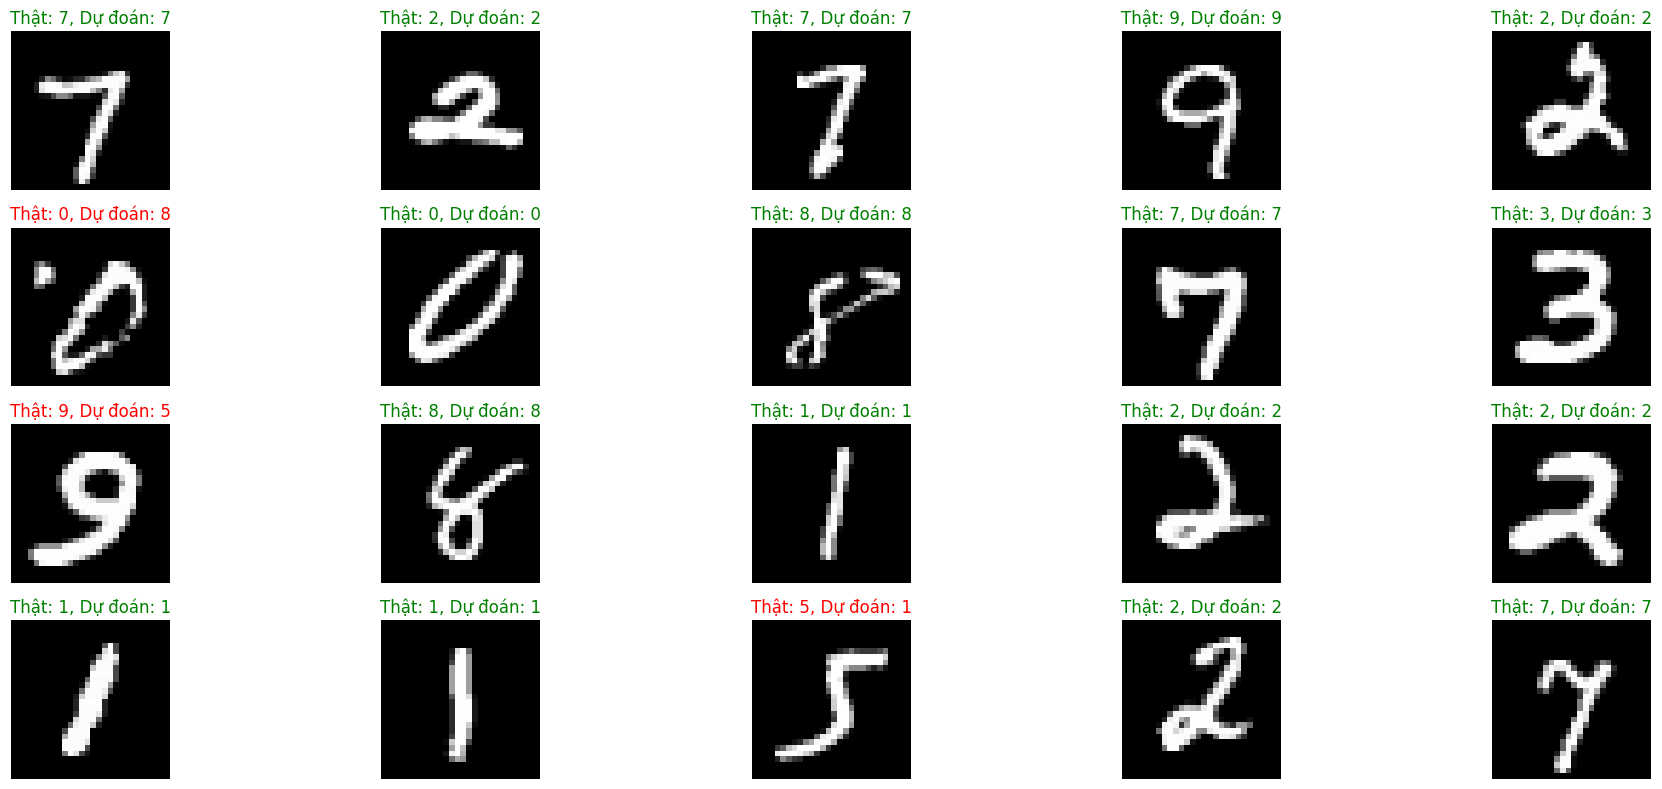

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def get_mnist_data(images_path, labels_path, num_images, shuffle=False, _is=True, image_size=28): 
    """ 
    Đọc dữ liệu MNIST từ file .gz
    """
    # read data 
    import gzip           # to decompress gz (zip) file 
 
    # open file training to read training data 
    f_images = gzip.open(images_path,'r') 
     
    # skip 16 first bytes because these are not data, only header infor 
    f_images.read(16) 
     
    # general: read num_images data samples if this parameter is set; 
    # if not, read all (60000 training or 10000 test)
    real_num = num_images if not shuffle else (60000 if _is else 10000) 
 
    # read all data to buf_images (28x28xreal_num) 
    buf_images = f_images.read(image_size * image_size * real_num) 
     
    # images 
    images = np.frombuffer(buf_images, dtype=np.uint8).astype(np.float32) 
    images = images.reshape(real_num, image_size, image_size,) 
     
    # Read labels    
    f_labels = gzip.open(labels_path,'r') 
    f_labels.read(8) 
     
    labels = np.zeros((real_num)).astype(np.int64) 
     
    # rearrange to correspond the images and labels 
    for i in range(0, real_num):    
        buf_labels = f_labels.read(1) 
        labels[i] = np.frombuffer(buf_labels, dtype=np.uint8).astype(np.int64) 
     
    # shuffle to get random images data 
    if shuffle is True: 
        rand_id = np.random.randint(real_num, size=num_images) 
        images = images[rand_id, :] 
        labels = labels[rand_id,] 
     
    # change images data to type of vector 28x28 dimentional 
    images = images.reshape(num_images, image_size * image_size) 
    return images, labels

def svm_loss_vectorized(W, X, y, reg): 
    d, C = W.shape  
    _, N = X.shape  
    loss = 0  
    dW = np.zeros_like(W) 
     
    Z = W.T.dot(X)      
     
    correct_class_score = np.choose(y, Z).reshape(N,1).T      
    margins = np.maximum(0, Z - correct_class_score + 1)  
    margins[y, np.arange(margins.shape[1])] = 0 
    # Loss function 
    loss = np.sum(margins, axis = (0, 1)) 
    loss /= N  
    loss += 0.5 * reg * np.sum(W * W) 
     
    F = (margins > 0).astype(int) 
    F[y, np.arange(F.shape[1])] = np.sum(-F, axis = 0) 
    # Gradient 
    dW = X.dot(F.T)/N + reg*W 
    return loss, dW

def multiclass_svm_GD(X, y, Winit, reg, lr=.1, batch_size=100, num_iters=1000, print_every=100): 
    W = Winit.copy()  # Tạo bản sao để không thay đổi giá trị truyền vào
    loss_history = np.zeros(num_iters) 
    for it in range(num_iters): 
        # randomly pick a batch of X 
        idx = np.random.choice(X.shape[1], batch_size) 
        X_batch = X[:, idx] 
        y_batch = y[idx] 
 
        loss_history[it], dW = svm_loss_vectorized(W, X_batch, y_batch, reg) 
 
        W -= lr*dW  
        if it % print_every == 0: 
            print(f'it {it}/{num_iters}, loss = {loss_history[it]:.6f}') 
 
    return W, loss_history

def predict(W, X):
    scores = W.T.dot(X)
    y_pred = np.argmax(scores, axis=0)
    return y_pred

train_images_path = 'train-images-idx3-ubyte.gz'
train_labels_path = 'train-labels-idx1-ubyte.gz'
test_images_path = 't10k-images-idx3-ubyte.gz'
test_labels_path = 't10k-labels-idx1-ubyte.gz'

# train:1000, test: 500
print("Đọc dữ liệu...")
train_images, train_labels = get_mnist_data(
    train_images_path, train_labels_path, 1000, shuffle=True) 
 
test_images, test_labels = get_mnist_data(
    test_images_path, test_labels_path, 500, _is=False, shuffle=True) 
 
print(f"Kích thước dữ liệu huấn luyện: {train_images.shape}, nhãn: {train_labels.shape}")
print(f"Kích thước dữ liệu kiểm tra: {test_images.shape}, nhãn: {test_labels.shape}")

plt.figure(figsize=(15, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Nhãn: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()

print("Chuẩn hóa dữ liệu...")
train_images = train_images / 255.0 
test_images = test_images / 255.0

X_train = train_images.T  # Chuyển từ (N, d) sang (d, N)
X_test = test_images.T
y_train = train_labels
y_test = test_labels

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}")

d = X_train.shape[0]  # Số chiều đặc trưng (784 đối với MNIST)
C = 10  # Số lớp (10 chữ số từ 0 đến 9)
reg = 0.0005  # Tham số điều chuẩn - có thể điều chỉnh

# Khởi tạo trọng số với phân phối chuẩn
np.random.seed(42)
W_init = np.random.randn(d, C) * 0.001

lr = 0.5 
batch_size = 100  
num_iters = 1500  
print_every = 100  

# training loops
W_trained, loss_history = multiclass_svm_GD(X_train, y_train, W_init, reg, 
                                          lr=lr, batch_size=batch_size, 
                                          num_iters=num_iters, print_every=print_every)

# training loss
plt.figure(figsize=(10, 5))
plt.plot(loss_history)
plt.title('Training loss')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.show()

# evaluate
y_train_pred = predict(W_trained, X_train)
train_accuracy = np.mean(y_train_pred == y_train)

y_test_pred = predict(W_trained, X_test)
test_accuracy = np.mean(y_test_pred == y_test)

print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.ylabel('Ground truth')
plt.xlabel('Predicted')
plt.show()

print(classification_report(y_test, y_test_pred))

# Hiển thị một số hình ảnh với nhãn đúng và nhãn dự đoán
def display_predictions(images, true_labels, pred_labels, n_samples=20):
    # Chọn ngẫu nhiên n_samples hình ảnh
    indices = np.random.choice(len(images), n_samples, replace=False)
    
    plt.figure(figsize=(20, 8))
    for i, idx in enumerate(indices):
        plt.subplot(4, 5, i+1)
        plt.imshow(images[idx].reshape(28, 28), cmap='gray')
        if true_labels[idx] == pred_labels[idx]:
            color = 'green'
        else:
            color = 'red'
        plt.title(f"Thật: {true_labels[idx]}, Dự đoán: {pred_labels[idx]}", color=color)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Hiển thị kết quả dự đoán
print("Một số ví dụ dự đoán:")
display_predictions(test_images, y_test, y_test_pred)